In [3]:
import re

def clean_script(text):
    """Replace any white space with a single space, and fix up backslashes.
    """
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.replace("\'", "'")
    
    return text

In [7]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from time import time

script_dl_start = time()

script_base_url = 'https://www.springfieldspringfield.co.uk'
episodes = {}

# Load up the main episodes page
eps_pg = urlopen(script_base_url + '/episode_scripts.php?tv-show=the-simpsons')
eps_pg_soup = BeautifulSoup(eps_pg, 'html.parser')

season_divs = eps_pg_soup.select('div.season-episodes')
# Loop through every season and get the links to the episodes
for season_div in season_divs:
    season_name = season_div.find('h3').get_text()
    print(season_name)
    episodes[season_name] = {}
    ep_links = season_div.select('a.season-episode-title')
    
    # Loop through all the episodes per season and save the script text
    for ep_link in ep_links:
        ep_title = ep_link.get_text()
        print('\t{ep_title}'.format(ep_title=ep_title))
        episodes[season_name][ep_title] = {}
        script_link = ep_link['href']
        script_pg = urlopen(script_base_url + '/' + script_link)
        script_pg_soup = BeautifulSoup(script_pg)
        script_text_raw = script_pg_soup.select('div.scrolling-script-container')[0].get_text()
        script_text_clean = clean_script(script_text_raw)
        episodes[season_name][ep_title]['script'] = script_text_clean
        
elapsed_time = time() - script_dl_start
print('Time: ' + str(elapsed_time))

Season 1
	1. Simpsons Roasting on an Open Fire
	2. Bart the Genius
	3. Homer's Odyssey
	4. There's No Disgrace Like Home
	5. Bart the General
	6. Moaning Lisa
	7. The Call of the Simpsons
	8. The Telltale Head
	9. Life on the Fast Lane
	10. Homer's Night Out
	11. The Crepes of Wrath
	12. Krusty Gets Busted
	13. Some Enchanted Evening
Season 2
	1. Bart Gets an F
	2. Simpson and Delilah
	3. Treehouse of Horror
	4. Two Cars in Every Garage and Three Eyes on Every Fish
	5. Dancin' Homer
	6. Dead Putting Society
	7. Bart vs. Thanksgiving
	8. Bart the Daredevil
	9. Itchy & Scratchy & Marge
	10. Bart Gets Hit by a Car
	11. One Fish, Two Fish, Blowfish, Blue Fish
	12. The Way We Was
	13. Homer vs. Lisa and the Eighth Commandment
	14. Principal Charming
	15. Oh Brother, Where Art Thou?
	16. Bart's Dog Gets an F
	17. Old Money
	18. Brush With Greatness
	19. Lisa's Substitute
	20. The War of the Simpsons
	21. Three Men and a Comic Book
	22. Blood Feud
Season 3
	1. Stark Raving Dad
	2. Mr. Lisa Go

	16. 'Scuse Me While I Miss the Sky
	17. Three Gays of the Condo
	18. Dude, Where's My Ranch?
	19. Old Yeller-Belly
	20. Brake My Wife, Please
	21. The Bart of War
	22. Moe Baby Blues
Season 15
	1. Treehouse of Horror XIV
	2. My Mother the Carjacker
	3. The President Wore Pearls
	4. The Regina Monologues
	5. The Fat and the Furriest
	6. Today I am a Clown
	7. 'Tis the Fifteenth Season
	8. Marge vs. Singles, Seniors, Childless Couples and Teens, and Gays
	9. I, (Annoyed Grunt)-Bot
	10. Diatribe of a Mad Housewife
	11. Margical History Tour
	12. Milhouse Doesn't Live Here Anymore
	13. Smart & Smarter
	14. The Ziff Who Came to Dinner
	15. Co-Dependent's Day
	16. Wandering Juvie
	17. My Big Fat Geek Wedding
	18. Catch 'Em If You Can
	19. Simple Simpson
	20. The Way We Weren't
	21. Bart-Mangled Banner
	22. Fraudcast News
Season 16
	1. Treehouse of Horror XV
	2. All's Fair in Oven War
	3. Sleeping With the Enemy
	4. She Used to Be My Girl
	5. Fat Man and Little Boy
	6. Midnight Rx
	7. Mommie

	17. 22 for 30
	18. A Father's Watch
	19. Caper Chase
	20. Looking for Mr. Goodbart
	21. Moho House
	22. Dogtown
Season 29
	1. The Serfsons
	2. Springfield Splendor
	3. Whistler's Father
	4. Treehouse of Horror XXVIII
	5. Grampy Can Ya Hear Me
	6. The Old Blue Mayor She Ain't What She Used to Be
	7. Singin' in the Lane
	8. Mr. Lisa's Opus
	9. Gone Boy
	10. Haw-Haw Land
	11. Frink Gets Testy
	12. Homer Is Where the Art Isn't
	13. 3 Scenes plus a Tag from a Marriage
	14. Fears of a Clown
	15. No Good Read Goes Unpunished
	16. King Leer
	17. Lisa Gets the Blues
	18. Forgive and Regret
	19. Left Behind
	20. Throw Grampa from the Dane
	21. Flanders' Ladder
Season 30
	1. Bart's Not Dead
	2. Heartbreak Hotel
	3. My Way or the Highway to Heaven
	4. Treehouse of Horror XXIX
	5. Baby You Can't Drive My Car
	6. From Russia Without Love
	7. Werking Mom
	8. Krusty the Clown
	9. Daddicus Finch
	10. 'Tis the 30th Season
	11. Mad About the Toy
	12. The Girl on the Bus
	13. I'm Dancing as Fat as I Can


In [8]:
# Save the episode data to load later if needed

import pickle

with open('simpsons_scripts.pickle', 'wb') as eps_file:
    pickle.dump(episodes, eps_file, protocol=pickle.HIGHEST_PROTOCOL)

# Uncomment below to load the data from pickle file
#with open('simpsons_scripts.pickle', 'rb') as eps_file:
#    episodes = pickle.load(eps_file)

In [9]:
# Go through the seasons and add scripts to a list to facilitate vectorization
ep_scripts = []
ep_script_lookup = {}
for season in episodes:
    for episode in episodes[season]:
        ep_scripts.append(episodes[season][episode]['script'])
        ep_script_lookup[len(ep_scripts)-1] = {}
        ep_script_lookup[len(ep_scripts)-1]['season'] = season
        ep_script_lookup[len(ep_scripts)-1]['title'] = episode

In [10]:
# Use Scikit-Learn TF-IDF feature
from sklearn.feature_extraction.text import TfidfVectorizer

# TODO: experiment with parameters
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, ngram_range=(1,3), min_df=2, max_df=0.5)
X = tfidf_vectorizer.fit_transform(ep_scripts)
X_array = X.toarray()

In [14]:
# Take a peek at how the results are

episode = 37
print(ep_script_lookup[episode])
ep_max = X_array[episode].argmax()
tfidf_vectorizer.get_feature_names()[ep_max]

{'season': 'Season 3', 'title': '3. When Flanders Failed'}


'left handed'

In [17]:
# Sentiment analysis with nltk library

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import math
import string

ep_script = ep_scripts[37]
ep_script_sentences = sent_tokenize(ep_script)
ep_script_words = word_tokenize(ep_script)

# Remove punctuation and empty and make lowercase
ep_script_words = [''.join(c for c in s if s not in string.punctuation) for s in ep_script_words]
ep_script_words = [s.lower() for s in ep_script_words if s]

print('# sentences:', len(ep_script_sentences))
print('# words:', len(ep_script_words))

ep_sentiment_scores = []
sid = SentimentIntensityAnalyzer()

# Sliding window approach as described in: 
# "The emotional arcs of stories are dominated by six basic shapes", https://arxiv.org/abs/1606.07772
words_per_window = 100
starting_word_idx = 0
while starting_word_idx + words_per_window < len(ep_script_words):
    script_slice = ep_script_words[starting_word_idx:starting_word_idx+words_per_window]
    ss = sid.polarity_scores(' '.join(script_slice))
    ep_sentiment_scores.append(ss['compound'])
    print('\'' + ' '.join(script_slice) + '\'' + '\n\tScore: ' + str(ss['compound']))
    starting_word_idx += 1

[nltk_data] Downloading package punkt to /Users/allen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/allen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# sentences: 440
# words: 2564
'ahh the simpsons d'oh homer you silly goose the weed-whacker 's just for the edges you 'll be out here all day i 'm almost done you are a picture and a half if you 're finished by tomorrow come on over and we 'll put the heat to the meat nummy-nummy-num i 'll be there notty-notty-not ''the flanders are having a beef-a-thon incredible nedibles maudacious vittles '' i think it means he 's having a barbecue why does n't he just say so he 's trying to be friendly if you gave ned flanders a chance -- i do'
	Score: 0.6486
'the simpsons d'oh homer you silly goose the weed-whacker 's just for the edges you 'll be out here all day i 'm almost done you are a picture and a half if you 're finished by tomorrow come on over and we 'll put the heat to the meat nummy-nummy-num i 'll be there notty-notty-not ''the flanders are having a beef-a-thon incredible nedibles maudacious vittles '' i think it means he 's having a barbecue why does n't he just say so he 's trying 

'i smell the potatoes au gratin of marge simpson mm-mm-mm-mmm hi ned um homer sends his apologies but um there was some important work at the plant that only he could take care of we now return to the canadian football league draft and so the rough riders who scored only four rouges all last season jack stupid flanders go ahead marge have a ball what if they came back and i was dead from not eating they 'd cry their eyes out ''we should have never gone to the flanders ''why did we go to the flanders and leave'
	Score: -0.8834
'smell the potatoes au gratin of marge simpson mm-mm-mm-mmm hi ned um homer sends his apologies but um there was some important work at the plant that only he could take care of we now return to the canadian football league draft and so the rough riders who scored only four rouges all last season jack stupid flanders go ahead marge have a ball what if they came back and i was dead from not eating they 'd cry their eyes out ''we should have never gone to the flande

	Score: 0.9565
'store for southpaws everything from left-handed apple peelers to left-handed scissors going to call it `` the leftorium '' so homer i 'm dying to know what do you think ofthe leftorium it sounds like a pretty dumb idea to me i know it 's a little risky and it 's going to be a lot of hard work but it 's going to be a lot of fun too fun where is this store flanders the merry old land of oz oh no the springfield mall here you two make a wish nah it 's fun no it is'
	Score: 0.9565
'for southpaws everything from left-handed apple peelers to left-handed scissors going to call it `` the leftorium '' so homer i 'm dying to know what do you think ofthe leftorium it sounds like a pretty dumb idea to me i know it 's a little risky and it 's going to be a lot of hard work but it 's going to be a lot of fun too fun where is this store flanders the merry old land of oz oh no the springfield mall here you two make a wish nah it 's fun no it is n't'
	Score: 0.9565
'southpaws everything

'there 's something good on do n't you think you should get a little fresh air yeah but what are you going to do tv gives so much and asks so little it 's a boy 's best friend that 's the problem even as we speak millions of children are staring at the tv instead of getting some much-needed exercise those children 's parents should be ashamed of themselves hello i am akira huahh that did n't hurt very much because i know the ancient art of karate karate focuses the mind and gives one self-confidence people from all'
	Score: 0.8746
''s something good on do n't you think you should get a little fresh air yeah but what are you going to do tv gives so much and asks so little it 's a boy 's best friend that 's the problem even as we speak millions of children are staring at the tv instead of getting some much-needed exercise those children 's parents should be ashamed of themselves hello i am akira huahh that did n't hurt very much because i know the ancient art of karate karate focuses the

	Score: 0.9191
'pokey but things are going to pick up oh i am so sorry how much do i owe you now that was an accident really well thanks could you validate my parking absitively posolutely so flanders have you sold anything not yet but one of the mall security guards took a long look at a left-handed ice cream scoop greetings i am akira your guide on the path to true karate and this is our map the art of war by sun tzu it will teach us our most important lesson we learn karate so we need never use it'
	Score: 0.9191
'but things are going to pick up oh i am so sorry how much do i owe you now that was an accident really well thanks could you validate my parking absitively posolutely so flanders have you sold anything not yet but one of the mall security guards took a long look at a left-handed ice cream scoop greetings i am akira your guide on the path to true karate and this is our map the art of war by sun tzu it will teach us our most important lesson we learn karate so we need never 

'do you think of your bestest buddy now dad do you know what `` schadenfreude '' is no i do not know what `` schadenfreude '' is please tell me because i 'm dying to know it 's german for `` shameful joy -- '' taking pleasure in others suffering i 'm just glad to see him fall flat on his butt he 's usually all happy and comfortable and surrounded by loved ones and it makes me feel -- what 's the opposite of that `` shameful joy '' thing of yours sour grapes those germans have a word'
	Score: 0.9501
'you think of your bestest buddy now dad do you know what `` schadenfreude '' is no i do not know what `` schadenfreude '' is please tell me because i 'm dying to know it 's german for `` shameful joy -- '' taking pleasure in others suffering i 'm just glad to see him fall flat on his butt he 's usually all happy and comfortable and surrounded by loved ones and it makes me feel -- what 's the opposite of that `` shameful joy '' thing of yours sour grapes those germans have a word for'
	Score

	Score: 0.6597
'out and show it to him before he dies that will learn them what did you swipe an `` i love lefty '' glass left-handed pinking shears pinking shears let 's go to the food court and steal some baked potatoes hey flanders when are your busy hours i expect things to pick up soon i think word of mouth is starting to spread i hear you validate parking tickets without purchase oh right as rain or as we say around here `` left as rain '' just stamp it okay hey homer how 's your neighbor 's store doing'
	Score: 0.6597
'and show it to him before he dies that will learn them what did you swipe an `` i love lefty '' glass left-handed pinking shears pinking shears let 's go to the food court and steal some baked potatoes hey flanders when are your busy hours i expect things to pick up soon i think word of mouth is starting to spread i hear you validate parking tickets without purchase oh right as rain or as we say around here `` left as rain '' just stamp it okay hey homer how 's yo

	Score: 0.865
'them have it this time simpson put that box on mr. burns desk chop-chop oh look smithers another member of our nuclear family with some helpful suggestions and what 's your name homer simpson sir simpson eh mm-hmm i 'm monty burns ''keep that handsome owner out of sight he 's distracting the female employees '' smithers got me sir oh it 's a real one ''no more apples in the vending machine please '' well that 's almost a sentence can i leave of course and do n't worry there will be plenty of apples for you nobody will'
	Score: 0.865
'have it this time simpson put that box on mr. burns desk chop-chop oh look smithers another member of our nuclear family with some helpful suggestions and what 's your name homer simpson sir simpson eh mm-hmm i 'm monty burns ''keep that handsome owner out of sight he 's distracting the female employees '' smithers got me sir oh it 's a real one ''no more apples in the vending machine please '' well that 's almost a sentence can i leave of c

	Score: 0.0946
''s not good enough for you but it 's good enough for me i would n't be caught dead buying this hello got your eye on the gas grill huh she 's a butane beaut i 'll give you 20 homer i paid 300 for this just last year 20 take it or leave it oh homer be reasonable sorry no cash for neddy homer keep all money bye-bye neddy all right homer 20 20 i do n't want it what it was a passing fancy although if you threw in a few lawn chairs maybe that tool bench it'
	Score: 0.0946
'not good enough for you but it 's good enough for me i would n't be caught dead buying this hello got your eye on the gas grill huh she 's a butane beaut i 'll give you 20 homer i paid 300 for this just last year 20 take it or leave it oh homer be reasonable sorry no cash for neddy homer keep all money bye-bye neddy all right homer 20 20 i do n't want it what it was a passing fancy although if you threw in a few lawn chairs maybe that tool bench it might'
	Score: 0.0946
'good enough for you but it 's good 

'to ask you why you do n't think you need to pay your bills oh i know i need to pay them but there 's just so many do you feel good owing money we 've been very patient with you mr. flanders i know but -- wait a minute i 'm homer simpson ned flanders lives over there oh flanders is in debt are you sure we do n't make mistakes damned right-handed ledgers i ca n't write in these things there 's a store you 're homer simpson see you thursday d'oh knock 'em dead boy kid 's'
	Score: 0.1633
'ask you why you do n't think you need to pay your bills oh i know i need to pay them but there 's just so many do you feel good owing money we 've been very patient with you mr. flanders i know but -- wait a minute i 'm homer simpson ned flanders lives over there oh flanders is in debt are you sure we do n't make mistakes damned right-handed ledgers i ca n't write in these things there 's a store you 're homer simpson see you thursday d'oh knock 'em dead boy kid 's going'
	Score: 0.1633
'you why you do n

'come on karate kid waste me it 's funny how two wrongs sometimes make a right homer over here flanders i want to give you your stuff back well there 's no house to put it in homer not since that nice fellow from the bank -- who was only doing his job -- came and locked it up you 're living in your car oh no it 's just a camp-out tonight then off to my sister 's apartment in capital city what do you think kids the big city todd i want to talk to your uncle homer'
	Score: -0.4464
'on karate kid waste me it 's funny how two wrongs sometimes make a right homer over here flanders i want to give you your stuff back well there 's no house to put it in homer not since that nice fellow from the bank -- who was only doing his job -- came and locked it up you 're living in your car oh no it 's just a camp-out tonight then off to my sister 's apartment in capital city what do you think kids the big city todd i want to talk to your uncle homer you'
	Score: -0.4464
'karate kid waste me it 's funny 

	Score: 0.9493
'swine listen flanders do you still have that store for two more days then it becomes libertarian party headquarters i hope they have better luck you open that store tomorrow homer there 's no point i said do it hello jerry homer simpson remember last month when i paid back that loan well now i need you to do a favor for me a left-handed corkscrew oh baby ''kiss me -- i 'm left-handed '' that 's a classic whoa it 's homer simpson tell him i went out he needs you to help ned flanders ned is in trouble'
	Score: 0.9325
'listen flanders do you still have that store for two more days then it becomes libertarian party headquarters i hope they have better luck you open that store tomorrow homer there 's no point i said do it hello jerry homer simpson remember last month when i paid back that loan well now i need you to do a favor for me a left-handed corkscrew oh baby ''kiss me -- i 'm left-handed '' that 's a classic whoa it 's homer simpson tell him i went out he needs you to

# sentiment scores: 2464
[0.6486, 0.6486, 0.3964, 0.3964, 0.3964, 0.3964, 0.3964, 0.6977, 0.6977, 0.6977, 0.6977, 0.6977, 0.6977, 0.6977, 0.6977, 0.5223, 0.5223, 0.5223, 0.5223, 0.5223, 0.5223, 0.5223, 0.5223, 0.5223, 0.5223, 0.5223, 0.5223, 0.5223, 0.5223, 0.5223, 0.5223, 0.7409, 0.7409, 0.7409, 0.7409, 0.763, 0.763, 0.8581, 0.9076, 0.9076, 0.9076, 0.9076, 0.9076, 0.9076, 0.9076, 0.9076, 0.9076, 0.9076, 0.9076, 0.9076, 0.9076, 0.9076, 0.9227, 0.9296, 0.9296, 0.9296, 0.9296, 0.9296, 0.9296, 0.9296, 0.9296, 0.9529, 0.9296, 0.9296, 0.9296, 0.9296, 0.9296, 0.9296, 0.9296, 0.9296, 0.9296, 0.9296, 0.9296, 0.9582, 0.9582, 0.9582, 0.9651, 0.9651, 0.9651, 0.9651, 0.9651, 0.9651, 0.9651, 0.9651, 0.9651, 0.9651, 0.9651, 0.9669, 0.9669, 0.9669, 0.955, 0.955, 0.955, 0.955, 0.955, 0.955, 0.955, 0.9475, 0.9475, 0.8288, 0.8288, 0.8922, 0.8608, 0.8608, 0.8945, 0.8945, 0.8945, 0.8641, 0.8641, 0.8641, 0.8641, 0.8641, 0.8641, 0.8641, 0.9319, 0.9398, 0.9398, 0.9398, 0.9398, 0.9398, 0.9398, 0.9398, 0.9398,

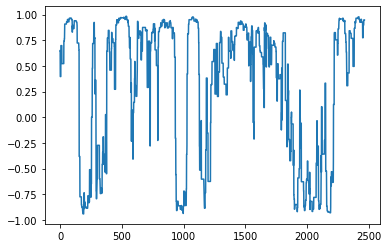

In [18]:
# Do some basic plotting of the sentiment scores

import matplotlib.pyplot as plt
%matplotlib inline

print('# sentiment scores:', len(ep_sentiment_scores))
print(ep_sentiment_scores)
plt.plot(ep_sentiment_scores)
plt.show()

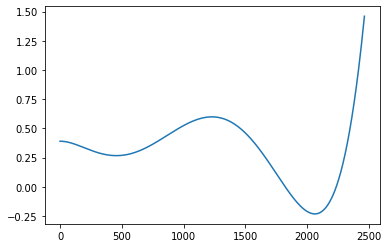

In [19]:
# Smooth out the chart

import numpy as np

def get_coeff_value(x, coeffs):
    ys = []
    for x_val in x:
        y = 0
        for i, coeff in enumerate(coeffs):
            y += coeff*x_val**i
        ys.append(y)
    
    return ys

ss_ids = [i for i in range(len(ep_sentiment_scores))]

# TODO: experiement with different degree values
z = np.polynomial.polynomial.polyfit(ss_ids, ep_sentiment_scores, 5)
plt.plot(get_coeff_value(ss_ids, z))
plt.show()